## PROCESSAMENTO DE IMAGENS 

**Objetivos da aula:**

*   apresentar e aplicar o dlib para detecção de face


**Não se vive vive apenas de HAAR CASCADE**

Muito obrigado Viola e Jones! Se não fosse por vocês não teriamos hoje outras bibliotecas tão incriveis para detecção de face quanto Haar Cascade.


Atualmente temos disponíveis para uso outras diversas redes já treinadas para detecção não apenas de face mas tambem de mãos, corpo, objetos.....


Vou destacar algumas redes:

   ***[Dlib C++](https://github.com/davisking/dlib)***
   
  ***[MTCNN](https://github.com/ipazc/mtcnn)***
   
   ***[Media Pipe](https://github.com/google/mediapipe)*** 
   


Cada uma das redes acima aplica usam técnicas de machine learning na etapa de treinamento para realizar a detecção essas redes dentre outras coisas conseguem realizar a deteção de face. Hoje vamos da destaque especial para a rede Dlid. Como sugestão leia a documetação e aprenda a usar as rede MTCNN e Media Pipe para descobrir qual é mais rápida, mais leve ou mais acurada.


## Dlib

A Dlib, além de realizar a predição para detectar uma face, ela consegue ressaltar alguns pontos da face. Esses pontos de destaque são chamados de **landmarks**, a Dlib consegue encontrar 68 pontos da face como cantos dos olhos, sobrancelhas, boca e ponta do nariz.

Cada landmark devolve uma coordenada da posição (x,y) da imagem.




<img src="landmark.png">

## Instalação Dlib

a instalação é feita com o comando:
   
```bash
pip install dlib
    
```

### Verificação da instalação


<img src="installdlib.png">


In [ ]:
#!pip install dlib


## Deteção de faces com o dlib

Vamos fazer o nosso "Hello World" usando a Dlib, neste caso, vamos implementar um detector de face simples.

Note que o método é bem similar ao que já conhecemos, a lista de faces detectadas é um pouco diferente. 


In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

import dlib
 
# carrega uma imagem para detectar o rosto
img1 = cv2.imread('lena.png')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)    
    
# Inicializa o detector dlib
detector = dlib.get_frontal_face_detector()

# Faz deteção das faces
faces = detector(img1_gray)

print(faces)


for face in faces:
        x,y = face.left(), face.top()  # topo esquerda
        x1,y1 = face.right(), face.bottom() #baixo direita
        
        cv2.rectangle(img1, (x, y), (x1, y1), (0, 255, 0), 1)


# Exibe imagem 
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)); plt.show();


## Detecção dos landmarks da face 

Para predição dos landmarks uma rede neural já treinada é utilizada, serão preditos 68 pontos da face. 

Para carregar os pesos da rede é necessário fazer o download em:

[hape_predictor_68_face_landmarks.dat](http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2)

#### Dlib positions
- ("mouth", (48, 68)),
- ("right_eyebrow", (17, 22)),
- ("left_eyebrow", (22, 27)),
- ("right_eye", (36, 42)),
- ("left_eye", (42, 48)),
- ("nose", (27, 35)),
- ("jaw", (0, 17))



rectangles[[(228, 228) (377, 377)]]


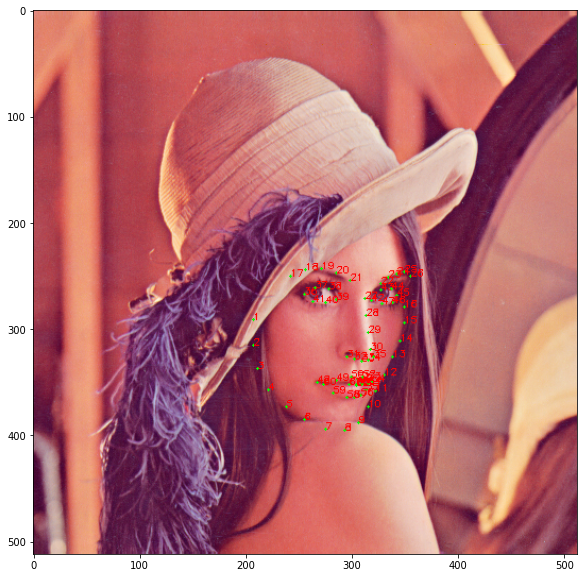

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

import dlib
 
# carrega uma imagem para detectar o rosto
img1 = cv2.imread('lena.png')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)    
    
# Inicializa o detector dlib
detector = dlib.get_frontal_face_detector()

# Inicializa o identificador de Landmark identifier. Você ter esse arquiva na pasta do projeto
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") 


# Faz deteção das faces
faces = detector(img1_gray)

print(faces)

# para todas faces detectadas
for face in faces:
        # Faz a predição dos landmarks
        shape = predictor(img1_gray, face) 
        for i in range(1,68): #São 68 landmark em cada face
            # Desenha um circulo e exibe o indice do landmark
            # shape.part(i).x devolve o valor x da coordenada
            cv2.circle(img1, (shape.part(i).x, shape.part(i).y), 1, (0,255,0), thickness=-1)
            # Escreve o indice de cada landmark na imagem
            cv2.putText(img1, str(i), (shape.part(i).x,shape.part(i).y), fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=0.3, color=(0, 0, 255))
        
# Exibe imagem 
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)); plt.show();


## Desafio 1 

Implemente um código que faz o crop de uma das regiões preditas.

Exemplo: crop da boca, sobrancelha, olho, nariz ou boca. 

posições:  267 319 345 364


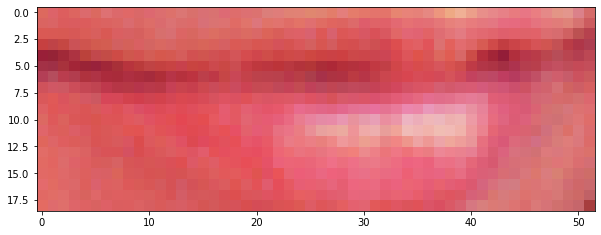

In [14]:
### Implemente sua solução aqui...


%matplotlib inline
import cv2
from matplotlib import pyplot as plt

import dlib
 
# carrega uma imagem para detectar o rosto
img1 = cv2.imread('lena.png')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)    
    
# Inicializa o detector dlib
detector = dlib.get_frontal_face_detector()

# Inicializa o identificador de Landmark identifier. Você ter esse arquiva na pasta do projeto
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") 


# Faz deteção das faces
faces = detector(img1_gray)

# para todas faces detectadas
for face in faces:
        # Faz a predição dos landmarks
        shape = predictor(img1_gray, face) 
       # for i in range(48,68): #São 68 landmark em cada face
            # Desenha um circulo e exibe o indice do landmark
            # shape.part(i).x devolve o valor x da coordenada
            #cv2.circle(img1, (shape.part(i).x, shape.part(i).y), 1, (0,255,0), thickness=-1)          
            
            # Escreve o indice de cada landmark na imagem
           # cv2.putText(img1, str(i), (shape.part(i).x,shape.part(i).y), fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=0.3, color=(0, 0, 255))
        X1 = shape.part(48).x
        X2 = shape.part(54).x
        Y1 = shape.part(50).y
        Y2 = shape.part(57).y
        print("posições: ", X1, X2, Y1,Y2)
        x,y = X1, Y1  # topo esquerda
        x1,y1 = X2, Y2 #baixo direita
        img2 = img1[Y1:Y2,X1:X2]
        #cv2.rectangle(img1, (x, y), (x1, y1), (0, 255, 0), 1)
        
# Exibe imagem 
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)); plt.show();




## Desafio 2

Faça um código capaz de detectar em tempo real as landmarks face pela webcam.

In [ ]:
### Implemente sua solução em um arquivo .py



## Desafio extra

Altere o aquivo de pesos da rede para rede **shape_predictor_5_face_landmarks** e análise o tempo de resposta da rede. Ficou mais rádida a detecção, a mesma coisa ou mais lenta? 

In [18]:
### Implemente sua solução em um arquivo .py


from math import dist
import time
import numpy as np
import dlib
import cv2




# inicializa o detector e preditor do dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


# inicializar vídeo
vs = cv2.VideoCapture(0)


# loop sobre os frames do vídeo
while True:
    ret, frame = vs.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detectar faces (grayscale)
    rects = detector(gray, 0)

    # loop nas detecções de faces
    for rect in rects:
        # Faz a predição dos landmarks
        shape = predictor(gray, face) 
        for i in range(1,68): #São 68 landmark em cada face
            # Desenha um circulo e exibe o indice do landmark
            # shape.part(i).x devolve o valor x da coordenada
            cv2.circle(frame, (shape.part(i).x, shape.part(i).y), 1, (0,255,0), thickness=-1)
            # Escreve o indice de cada landmark na imagem
            cv2.putText(frame, str(i), (shape.part(i).x,shape.part(i).y), fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=0.3, color=(0, 0, 255))
                

 

    # Exibe resultado
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    # tecla para sair do script "q"
    if key == ord("q"):
        break

# clean
cv2.destroyAllWindows()
vs.release()






## Tracking

O tracking de objetos ou de faces possui diversas aplicações.O rastreamento de objetos tenta estimar a trajetória do alvo ao longo da sequência de vídeo onde apenas a localização inicial de um alvo é conhecida. Basicamente o custo computacional para realização de rastreamento de um objeto é muito menor, o que é crítico em aplicativos em tempo real, comparado ao custo computacional para a detecção de um objeto, onde a cada frame é realizado a detecção do zero.  
 
Uma técnica muito poderosa para a realização de rastreamento é DCF (discriminative correlation filter).A biblioteca dlib implementa um rastreador baseado em DCF, que é fácil de usar para rastreamento de faces ou objetos.

Artigo bacana para se aprofundar na teoria:
https://arxiv.org/pdf/1611.08461.pdf








### Rastreamento de objetos


In [ ]:
import cv2
import dlib


def draw_text_info():
    """Função para escrever na tela as instruções de uso"""

    menu_pos = (10, 20)
    menu_pos_2 = (10, 40)
    menu_pos_3 = (10, 60)
    info_1 = "Selecione com o mouse o objeto para rastreamento"
    info_2 = "Use '1' para start, '2' para reset"

    cv2.putText(frame, info_1, menu_pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))
    cv2.putText(frame, info_2, menu_pos_2, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))
    if tracking_state:
        cv2.putText(frame, "Rastreando...", menu_pos_3, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))
    else:
        cv2.putText(frame, "Não rastreando", menu_pos_3, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))



points = []


# Função de callback do mouse
def mouse_click(event, x, y, flags, param):
    global points

    if event == cv2.EVENT_LBUTTONDOWN:
        points = [(x, y)]

    elif event == cv2.EVENT_LBUTTONUP:
        points.append((x, y))



capture = cv2.VideoCapture(0)


window_name = "tracking"
cv2.namedWindow(window_name)
cv2.setMouseCallback(window_name, mouse_click)

# Inicializa metodo de correlação de rastreamento
tracker = dlib.correlation_tracker()

# Variavel de estado
tracking_state = False

while True:
    ret, frame = capture.read()

    draw_text_info()

    # Se objeto esta selecionado
    if len(points) == 2:
        cv2.rectangle(frame, points[0], points[1], (0, 0, 255), 3)
        dlib_rectangle = dlib.rectangle(points[0][0], points[0][1], points[1][0], points[1][1])

    # Se é pra rastrear
    if tracking_state == True:
        tracker.update(frame)
        pos = tracker.get_position()
        cv2.rectangle(frame, (int(pos.left()), int(pos.top())), (int(pos.right()), int(pos.bottom())), (0, 255, 0), 3)

    # lê teclado
    key = 0xFF & cv2.waitKey(1)

    # '1' start
    if key == ord("1"):
        if len(points) == 2:
            # Start tracking:
            tracker.start_track(frame, dlib_rectangle)
            tracking_state = True
            points = []

    # '2' reset
    if key == ord("2"):
        points = []
        tracking_state = False

    if key == ord('q'):
        break

    cv2.imshow(window_name, frame)

# Release everything:
capture.release()
cv2.destroyAllWindows()

## Desafio 4

Com base no código acima, implemente um código que faz o tracking de face


In [ ]:
# Implemente sua solução aqui......




## Detector de fadiga

O detector de fadiga pode ser elaborado a partir a abertura dos olhos, o código a baixo foi inspirado no link:
[Artigo de refência](https://bit.ly/2CYC7Gf)

Além deste artigo, vamos utilizar algumas outras funções da OpenCV que ainda não conhecemos. 

cv2.convexHull = Cria um contorno com base nos pontos. https://learnopencv.com/convex-hull-using-opencv-in-python-and-c/


#### Dlib positions
- ("mouth", (48, 68)),
- ("right_eyebrow", (17, 22)),
- ("left_eyebrow", (22, 27)),
- ("right_eye", (36, 42)),
- ("left_eye", (42, 48)),
- ("nose", (27, 35)),
- ("jaw", (0, 17))

In [1]:
from math import dist
import time
import numpy as np
import dlib
import cv2



# definir constantes
EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 40
COUNTER = 0

def eye_aspect_ratio(eye):
    # calcula a distancia euclidiana vertical os olhos
    # vertical eye landmarks (x, y)-coordinates
    A = dist(eye[1], eye[5])
    B = dist(eye[2], eye[4])

    # # calcula a distancia euclidiana horizontal os olhos
    # eye landmark (x, y)-coordinates
    C = dist(eye[0], eye[3])

    # calcula uma taxa de abertura dos olhos
    ear = (A + B) / (2.0 * C)

    # return the eye aspect ratio
    return ear


# inicializa o detector e preditor do dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# pega os índices do previsor, para olhos esquerdo e direito
(lStart, lEnd) = (42, 48)
(rStart, rEnd) = (36, 42)

# inicializar vídeo
vs = cv2.VideoCapture(0)


# loop sobre os frames do vídeo
while True:
    ret, frame = vs.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detectar faces (grayscale)
    rects = detector(gray, 0)

    # loop nas detecções de faces
    for rect in rects:
        
        shape = predictor(gray, rect)
        #devolve shape em uma lista coords
        coords = np.zeros((shape.num_parts, 2), dtype=int)
        for i in range(0,68): #São 68 landmark em cada face
            coords[i] = (shape.part(i).x, shape.part(i).y)

        # extrair coordenadas dos olhos e calcular a proporção de abertura
        leftEye = coords[lStart:lEnd]
        rightEye = coords[rStart:rEnd]
        
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)

        # ratio média para os dois olhos
        ear = (leftEAR + rightEAR) / 2.0

        # convex hull cria um contorno com base nos pontos 
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

        # checar ratio x threshold
        if ear < EYE_AR_THRESH:
            COUNTER += 1

            # dentro dos critérios
            if COUNTER >= EYE_AR_CONSEC_FRAMES:
                cv2.putText(frame, "[ALERTA] FADIGA!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # caso acima do threshold, resetar o contador e desligar o alarme
        else:
            COUNTER = 0
            # desenhar a proporção de abertura dos olhos
        cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Exibe resultado
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    # tecla para sair do script "q"
    if key == ord("q"):
        break

# clean
cv2.destroyAllWindows()
vs.release()

## Desafio 5 

Inspirado na solução do detector de fadiga, implemente um código que faz a deteção de emoção. Ou seja, detecta se a pessoa esta sorrindo ou não.

<img src="boca.png">

In [ ]:
# Implemente sua solução aqui......



